#### Problem Statement

There is a real estate agent who knows that you are a Machine Learning Engineer and would like you to help build a machine learning model that can predict the price of the house given the information about that particular house.
The idea of creating a model clicked and you replied, "oh yeah, that sounds cool! Let's do it!"
You have understood the problem and probably you already have an idea of the type of models you will use. You know there are so many models such as random forests, decision trees, and neural networks but you have learned that it's always okay to start simple and so, you eventually settled for Linear Regression as this is not a complex problem.

Data Set: https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing

Task: Build a Linear Regression Model for House Price prediction.

I expect to see the following:


- Data Vizualization & EDA
- Data Preprocessing
- Building A Machine Learning Model & Making Predictions using either (sklearn or the manual approach)
- Evaluate Performance Of Your Regression Model Using RMSE (Root Mean Squared Error)



1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea



Submission Deadline: 16th October 2022.

Feel free to get in touch with me should you have any questions or need clarity on the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlretrieve

In [2]:
datas= pd.read_csv('testing.csv')
datas.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
datas_new = (datas).replace([np.inf, -np.inf], np.nan).dropna()

In [4]:
datas.replace([np.inf, -np.inf], np.nan, inplace=True)
datas.dropna(inplace=True)
print(datas)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [5]:
datas.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
datas.dropna()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

In [7]:
datas_new.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [8]:
datas.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [9]:
datas.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

In [10]:
datas_new.describe().transpose()

count           mean            std         min  \
longitude           20433.0    -119.570689       2.003578   -124.3500   
latitude            20433.0      35.633221       2.136348     32.5400   
housing_median_age  20433.0      28.633094      12.591805      1.0000   
total_rooms         20433.0    2636.504233    2185.269567      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20433.0    1424.946949    1133.208490      3.0000   
households          20433.0     499.433465     382.299226      1.0000   
median_income       20433.0       3.871162       1.899291      0.4999   
median_house_value  20433.0  206864.413155  115435.667099  14999.0000   

                            25%          50%         75%          max  
longitude             -121.8000    -118.4900    -118.010    -114.3100  
latitude                33.9300      34.2600      37.720      41.9500  
housing_median_age      18.0000      29.0000      37.000      52.0000  
total_rooms           1450.0000    2127.0000    3143.000   39320.0000  
total_bedrooms         296.0000     435.0000     647.000    6445.0000  
population             787.0000    1166.0000    1722.000   35682.0000  
households             280.0000     409.0000     604.000    6082.0000  
median_income            2.5637       3.5365       4.744      15.0001  
median_house_value  119500.0000  179700.0000  264700.000  500001.0000

In [11]:
datas.shape

(20433, 10)

In [12]:
datas.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
datas['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

#### 1)let us know how far the houses are from the the north and south pole of the equator,by checking the longitude and latitudes

In [14]:
datas[['longitude','latitude']].value_counts()

longitude  latitude
-122.41    37.80       15
-122.44    37.78       11
-122.42    37.80       11
-122.27    37.85       10
-122.44    37.79       10
                       ..
-120.69    35.64        1
           35.65        1
           36.84        1
           37.40        1
-114.31    34.19        1
Length: 12507, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

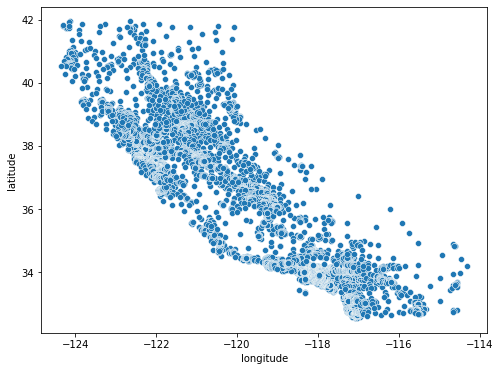

In [15]:
plt.figure(figsize=(8,6))
markers = {1:'P', 2:'X', 3:'D'} # P, X, and D are markers
sns.scatterplot(data=datas_new, x='longitude', y='latitude',markers=markers)

from our observation,when there is reduction in latitude there is an increase in longitude

### 20 we want to know the age range in respect to density

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

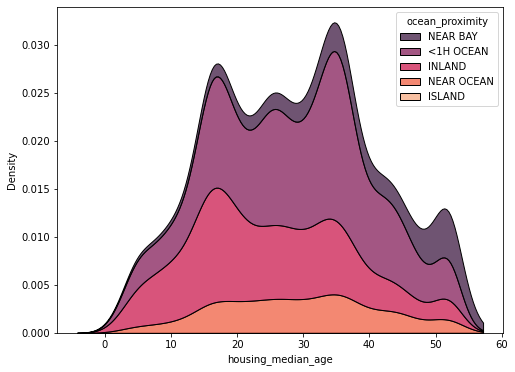

In [16]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=datas, x='housing_median_age', hue='ocean_proximity',palette = 'rocket',multiple='stack')

##### from the graph above, at the age of 40,the density is at its peak,meaning that there are a lot of people whose ages are 40 that are into housing.this could be due to experiences or affordability for that age group

### 3)let us find out the no of bedrooms in the houses in relation to frequency and age

In [17]:
datas['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

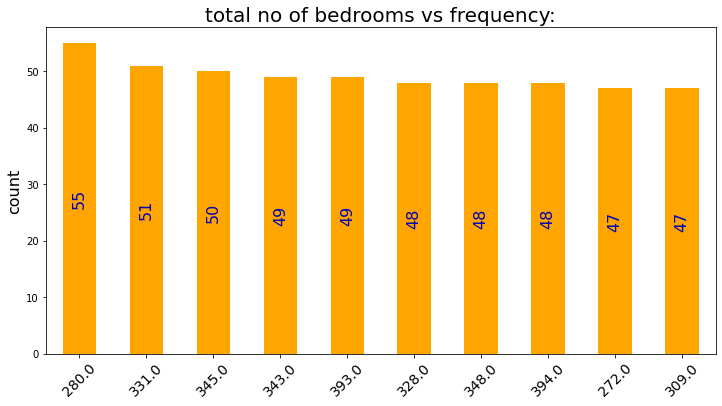

In [18]:
plt.figure(figsize=(12, 6))
ax = datas['total_bedrooms'].value_counts().head(10).plot(kind = 'bar',color = 'orange')
plt.title('total no of bedrooms vs frequency:', fontsize = 20)
plt.ylabel('count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.bar_label(ax.containers[0], label_type = 'center',fontsize = 16, rotation = 90, color = '#0000b3')
plt.show()

##### with respect to age,we have more people at 47 years of agewho have over 40 rooms.The number of people at age 55 are few in respect to the number of rooms they have

In [19]:
fig = px.histogram(datas,x='total_bedrooms',marginal='box',nbins=50,title='total bedrooms vs freq')
fig.update_layout(bargap=0.1)
fig.show()

#### 3) relating total_bedrooms with total_rooms and population.

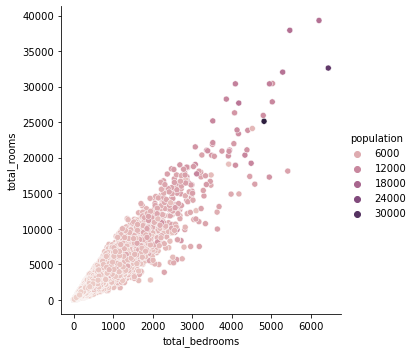

In [20]:
sns.relplot(x='total_bedrooms', y='total_rooms',hue='population', data=datas);

##### this observation,there are fewer people with more number of bedrooms and total rooms.we observed that less people have more bedrooms and total_rooms,while more people have less total rooms and less bedrooms,this could be as a result of factors such as income

#### 4) Median income vs ocean proximity, we want to know how income affects the choice of house in relation to the ocean proximity

In [21]:
fig = px.histogram(datas,x='median_income',marginal='box',color='ocean_proximity',nbins=50,color_discrete_sequence=['fuchsia'],
                   title ='median_income vs ocean_proximity')


fig.update_layout(bargap=0.5)
fig.show()

#### the higher the income the closer it is to ocean proximity.then when the median income increases btween 3.76-15.25,there is a decline in demand for houses close to ocean proximity. this means income is not a criteria. its based on prference of the individual.

#### 5) lets determine how income affects the value of house the people decided to go for. 

<Figure size 1296x720 with 0 Axes>

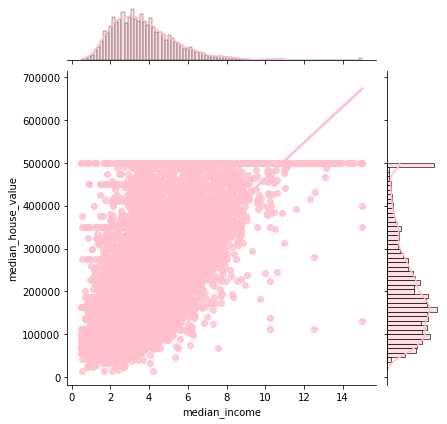

In [22]:
plt.figure(figsize=(18,10))

sns.jointplot(data=datas, x='median_income', y='median_house_value',color = "pink", kind='reg')

#### the value of housing is mostly determined by income when the income is high, the house value is 5000000 .

#### 6) lets find out the ages of people renting or buying houses in that region

In [23]:
datas['housing_median_age'].value_counts()


52.0    1265
36.0     856
35.0     818
16.0     762
17.0     694
34.0     682
26.0     611
33.0     609
25.0     562
32.0     560
18.0     560
37.0     528
15.0     507
19.0     499
27.0     482
24.0     473
30.0     470
28.0     468
20.0     462
29.0     453
31.0     449
23.0     445
21.0     444
14.0     410
22.0     395
38.0     385
39.0     366
42.0     363
44.0     353
43.0     351
40.0     301
13.0     298
41.0     293
45.0     286
10.0     263
11.0     252
46.0     245
5.0      242
12.0     236
9.0      204
8.0      203
47.0     195
4.0      190
48.0     174
7.0      173
6.0      157
50.0     135
49.0     133
3.0       62
2.0       58
51.0      47
1.0        4
Name: housing_median_age, dtype: int64

In [24]:
datas['housing_median_age'].head()


0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64

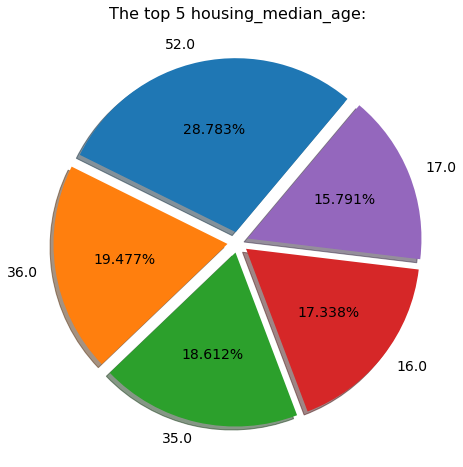

In [25]:
plt.figure(figsize= (18,8))
plt.pie(datas['housing_median_age'].value_counts().head(5), labels=datas['housing_median_age'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
        explode= [0.06]*5, shadow= True, startangle= 50, autopct= '%1.3F%%')
plt.title ( 'The top 5 housing_median_age:', fontsize= 16)
plt.show()

#### in respect to the pie chat above,a higher percentage at 52 years buy houses in that region,while at age 35-36 they are in high demand also

#### 6)let us know if the age affects the type of house people go for based on the value they get e.g comfort.

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

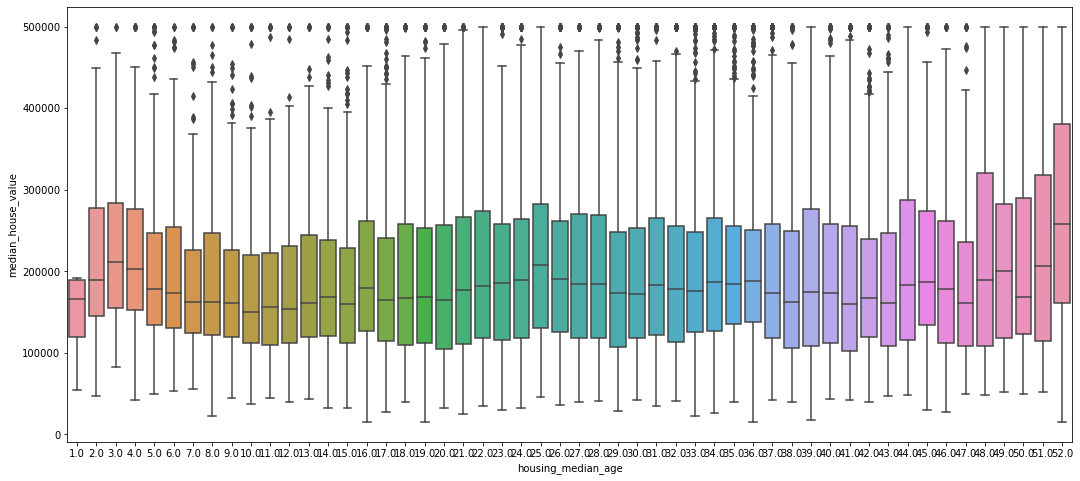

In [26]:
plt.figure(figsize= (18,8))
sns.boxplot(data=datas, x='housing_median_age', y='median_house_value')

#### comparing the age with value. the higher the age the higher the value. it means the older people know alot more about housing values either due to experience 

#### 7)lets find the  population of people with respect to their choices of bedrooms

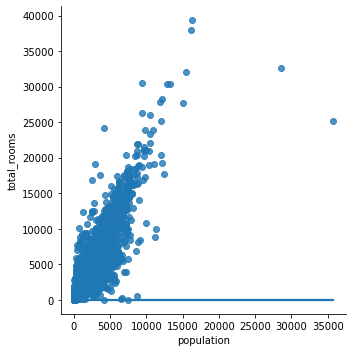

In [27]:
sns.lmplot(x='population', y='total_rooms', data=datas, logistic=True, y_jitter=0.03)

#### from the above scatterplot,fewer people buy more rooms,while more people buy lesser rooms

#### 8) lets relate ocean_proximity with population

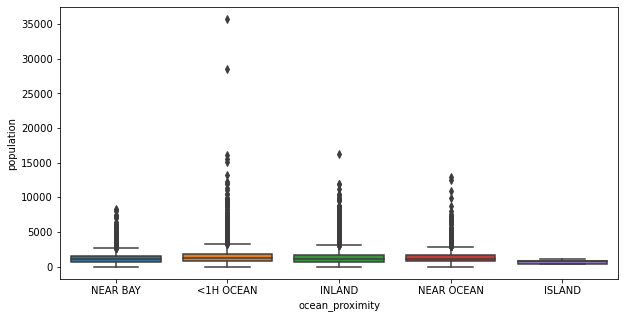

In [28]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'ocean_proximity', y = 'population', data = datas)
plt.show()

###### there is an increase in demand for ocean proximity in relation to the population. more people want to live closer to the ocean,0 number of people stay on the island, while a high number of 35000 people stay close to the ocean.this might be because of factors such as sight seeing, relaxation or coolness from the ocean. |

### 9) lets plot all in a pair grid

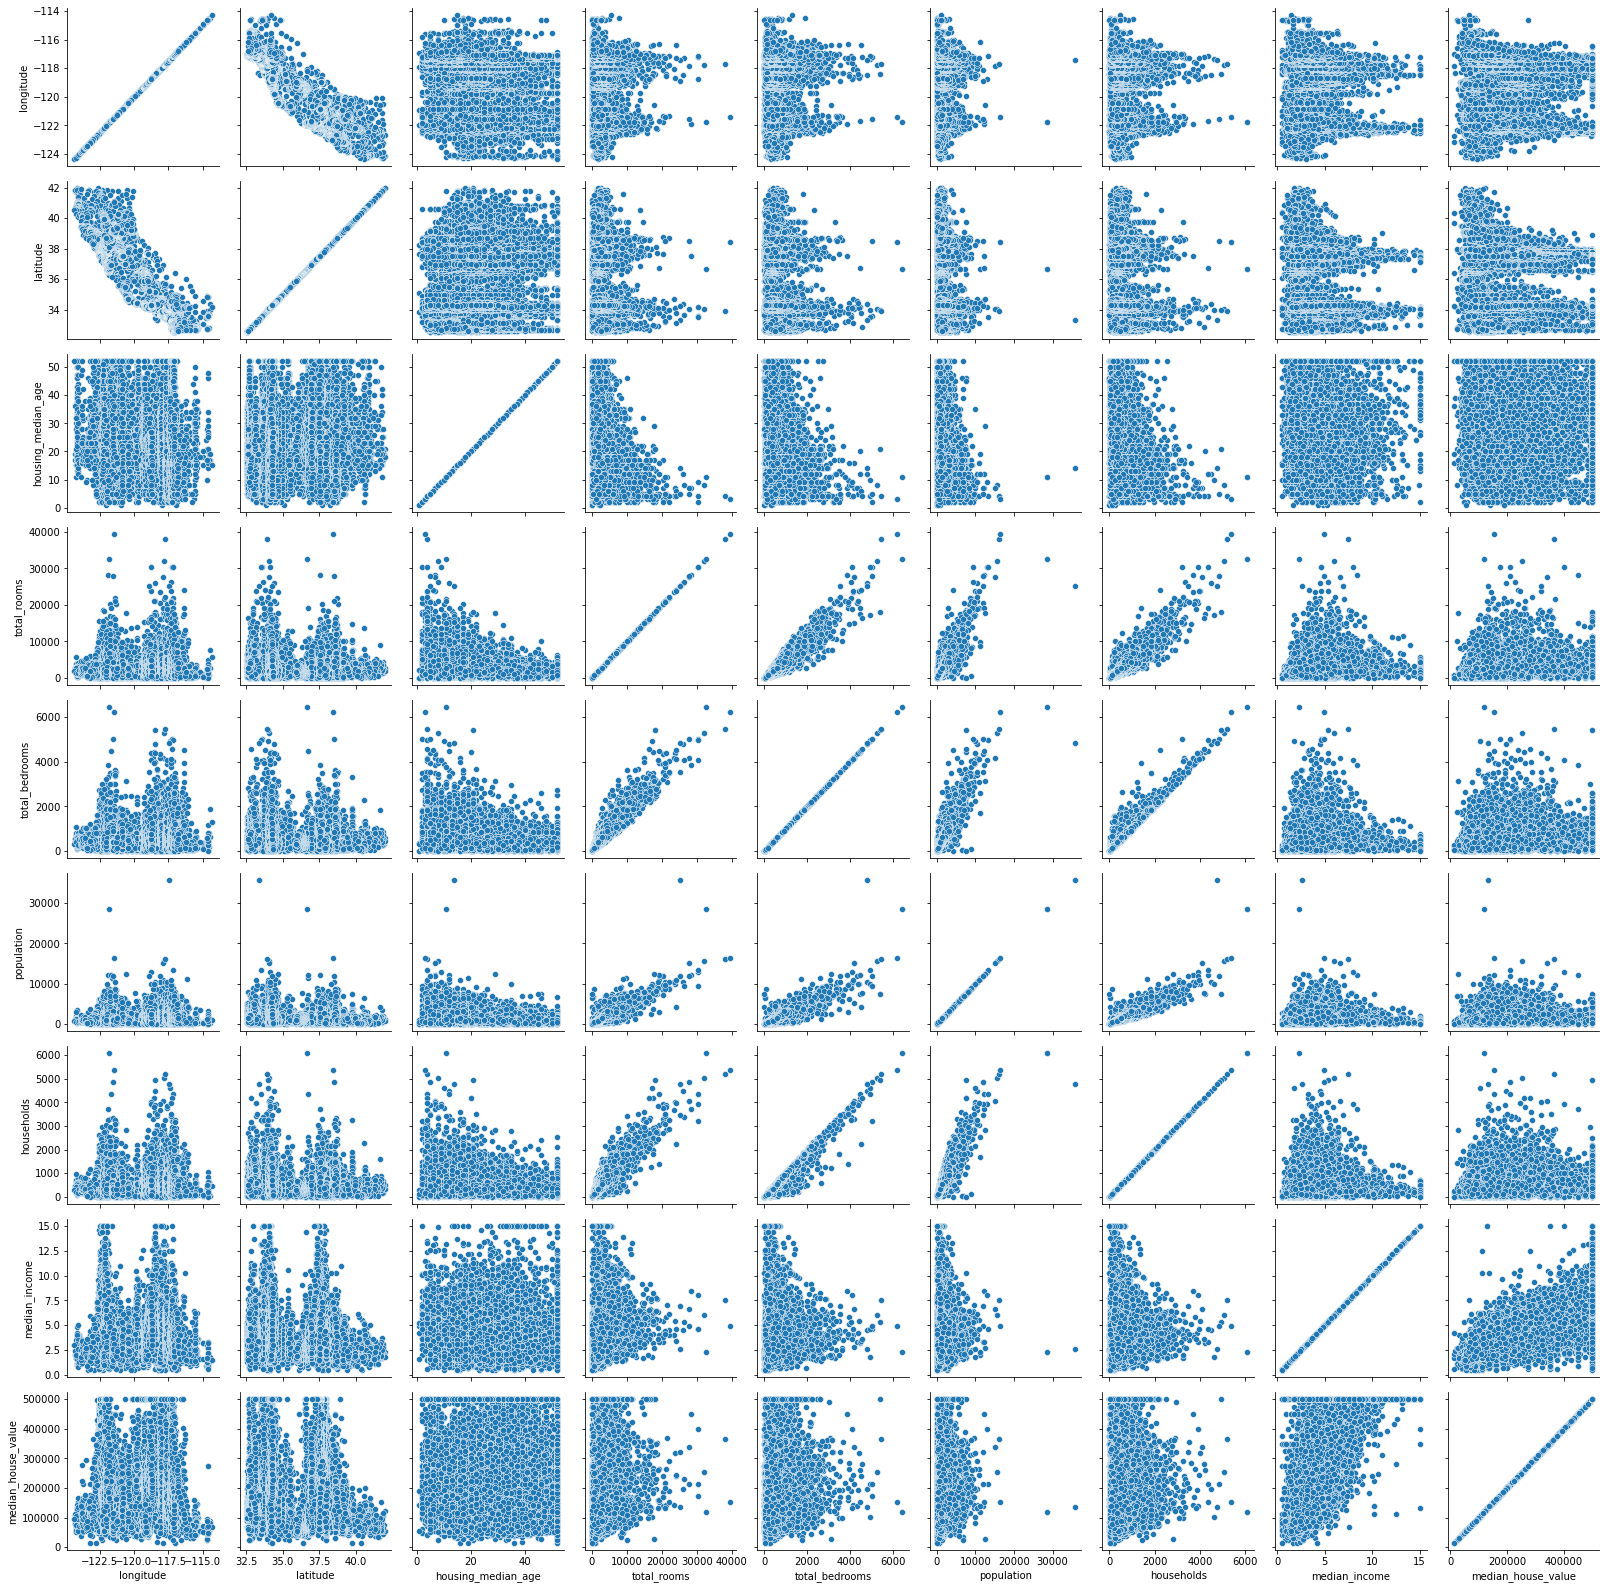

In [29]:
plot = sns.PairGrid(datas) 
plot.map(sns.scatterplot)

#### 10) lets get the datas that are missing

### missing data

<AxesSubplot:>

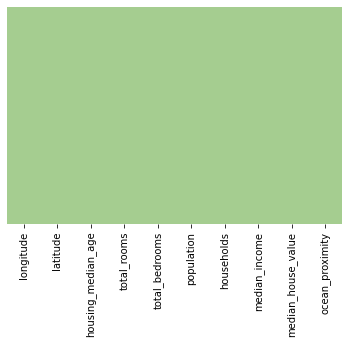

In [30]:
sns.heatmap(datas.isnull(),yticklabels=False,cbar = False,cmap ='crest')

##### from the map,there are no missing datas because we have tackled it from the top to enable the work easier

#### 10) lets look into how these various parts of the houses and people correlate

In [31]:
correlation = datas.corr()
correlation

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

<AxesSubplot:>

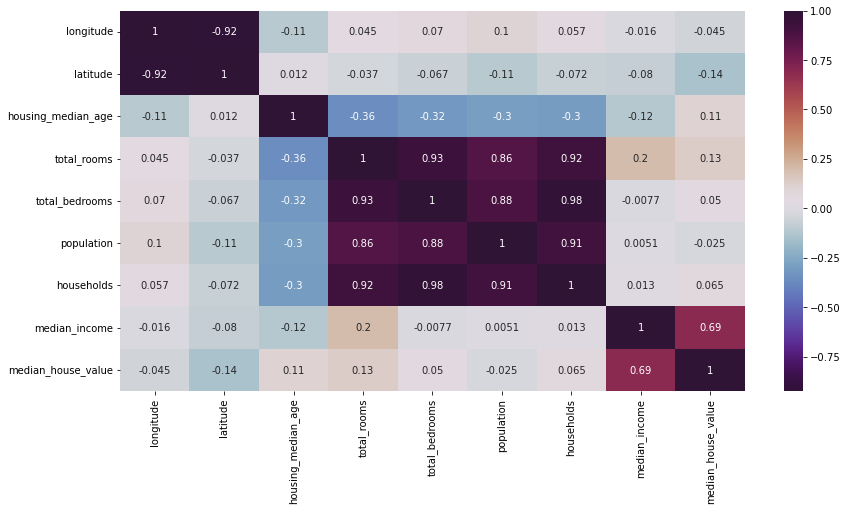

In [32]:
plt.figure(figsize=(14,7))

sns.heatmap(correlation, annot=True, cmap='twilight_shifted')

#### 1 is a major sign of perfect correlation. longitude,latitude,median_age,total_rooms are in perfect correlation . the colours at the top in the rectangular bar signify strong correlation.so lets look at what correlates perfectly with median_house_value. 

### DATA PREPROCESSING

### Problem Statement
There is a real estate agent who knows that you are a Machine Learning Engineer and would like you to help build a machine learning model that can predict the price of the house given the information about that particular house. The idea of creating a model clicked and you replied, "oh yeah, that sounds cool! Let's do it!" You have understood the problem and probably you already have an idea of the type of models you will use. You know there are so many models such as random forests, decision trees, and neural networks but you have learned that it's always okay to start simple and so, you eventually settled for Linear Regression as this is not a complex problem.
Data Set: https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing
Task: Build a Linear Regression Model for House Price prediction.

I expect to see the following:

- Data Vizualization & EDA
- Data Preprocessing
- Building A Machine Learning Model & Making Predictions using either (sklearn or the manual approach)
- Evaluate Performance Of Your Regression Model Using RMSE (Root Mean Squared Error)
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- median_house_value: Median house value for households within a block (measured in US Dollars)
- oceanProximity: Location of the house w.r.t ocean/sea


In [33]:
train = pd.read_csv('https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing')
test = pd.read_csv('https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing')

In [34]:
train = train.dropna(thresh=0.70*len(train), axis=1)

test = test.dropna(thresh=0.70*len(test), axis=1)

In [35]:
datas.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [36]:
input_col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'ocean_proximity']
target_col ='median_house_value'

In [37]:
train_input = datas[input_col].copy()
train_target= datas[target_col]

### selecting numerical and categorical features

In [38]:
num_col =['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
          'median_income','median_house_value']
cat_col =['ocean_proximity']

### encoding the categorical features

In [39]:
num_col =['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households',
          'median_income','median_house_value']
cat_col =['ocean_proximity']

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
encoder = OneHotEncoder(sparse= False, handle_unknown='ignore')

In [42]:
encoder.fit(train_input[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [43]:
encoded_col = list(encoder.get_feature_names_out(cat_col))


In [44]:
train_input[encoded_col] = encoder.transform(train_input[cat_col])

In [45]:
datas[['ocean_proximity']].value_counts()



ocean_proximity
<1H OCEAN          9034
INLAND             6496
NEAR OCEAN         2628
NEAR BAY           2270
ISLAND                5
dtype: int64

In [46]:
train_data = train_input[num_col + encoded_col]

In [47]:
train_input

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0            NEAR BAY                        0.0                     0.0   
1            NEAR BAY                        0.0                     0.0   
2            NEAR BAY                        0.0                     0.0   
3            NEAR BAY                        0.0                     0.0   
4            NEAR BAY                        0.0                     0.0   
...               ...                        ...                     ...   
20635          INLAND                        0.0                     1.0   
20636          INLAND                        0.0                     1.0   
20637          INLAND                        0.0                     1.0   
20638          INLAND                        0.0                     1.0   
20639          INLAND                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20433 rows x 15 columns]

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
train_input[num_col] = scaler.fit_transform(train_input[num_col])

### Merging back scaled numeric and encoded categorical features

In [51]:
train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [52]:
px.histogram(train_input,  x='ocean_proximity',marginal='box',title= 'ocean', color_discrete_sequence=['orange'])

#### these are the various types of ocean_proximities we have in relation to their counts,from the graph the <1Hocean has the highest number of counts.

In [53]:
from sklearn.linear_model import LinearRegression


In [54]:
train_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
count        20433.000000               20433.000000            20433.000000   
mean        206864.413155                   0.442128                0.317917   
std         115435.667099                   0.496652                0.465678   
min          14999.000000                   0.000000                0.000000   
25%         119500.000000                   0.000000                0.000000   
50%         179700.000000                   0.000000                0.000000   
75%         264700.000000                   1.000000                1.000000   
max         500001.000000                   1.000000                1.000000   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
count            20433.000000              20433.000000   
mean                 0.000245                  0.111095   
std                  0.015641                  0.314257   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  0.000000                  0.000000   
max                  1.000000                  1.000000   

       ocean_proximity_NEAR OCEAN  
count                20433.000000  
mean                     0.128615  
std                      0.334782  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000

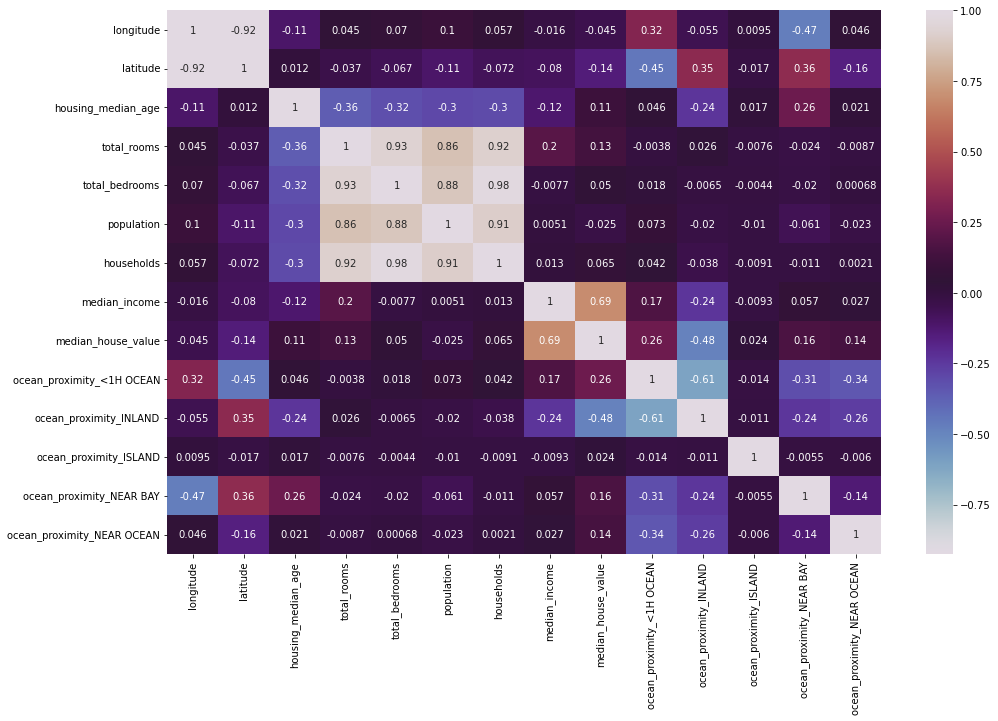

In [55]:
plt.figure(figsize = (16, 10))
sns.heatmap(train_data.corr(), annot = True, cmap="twilight")
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=train_data
y=train_target

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [59]:
print(f'The length of the train set is{len(X_train)}\nThe length of the validation set is {len(X_test)}')

The length of the train set is16346
The length of the validation set is 4087


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model=LinearRegression()

In [62]:
model.fit(X_train, y_train) # Train the model

LinearRegression()

In [63]:
y_preds=model.predict(X_test)

In [64]:
model.intercept_ 

2.852175384759903e-09

In [65]:
model.coef_ # These are the slope (model coefficients) which is also reffered to as the weights

array([ 3.29967443e-11,  3.16413562e-11, -1.35671319e-12,  1.33122680e-14,
       -2.49806252e-13,  3.69634878e-14,  5.52223198e-14, -4.63688976e-11,
        1.00000000e+00,  8.01455262e-11,  8.49299860e-11, -3.25492283e-10,
        7.89564441e-11,  8.14603265e-11])

In [66]:
feature_importance =pd.DataFrame({'Features':train_data.columns, 'Weights':model.coef_})
feats_df = feature_importance.sort_values(by=['Weights'], ascending=False)#sortingin descending order
feats_df

Features       Weights
8           median_house_value  1.000000e+00
10      ocean_proximity_INLAND  8.492999e-11
13  ocean_proximity_NEAR OCEAN  8.146033e-11
9    ocean_proximity_<1H OCEAN  8.014553e-11
12    ocean_proximity_NEAR BAY  7.895644e-11
0                    longitude  3.299674e-11
1                     latitude  3.164136e-11
6                   households  5.522232e-14
5                   population  3.696349e-14
3                  total_rooms  1.331227e-14
4               total_bedrooms -2.498063e-13
2           housing_median_age -1.356713e-12
7                median_income -4.636890e-11
11      ocean_proximity_ISLAND -3.254923e-10

In [2]:
fig=px.bar(feats_df, x=('ocean_proximity_INLAND','ocean_proximity_NEAR OCEAN','ocean_proximity_NEAR OCEAN','ocean_proximity_<1H OCEAN','ocean_proximity_NEAR BAY',
           'longitude','latitude','latitude','households','population','total_rooms	','total_bedrooms','housing_median_age',
           'median_income','ocean_proximity_ISLAND')
           y=('Weights', color_discrete_sequence=['green'], title='FeatureImportance')
fig.update_layout(bargap=0.1)
fig.show()

SyntaxError: invalid syntax (4168811124.py, line 4)

In [68]:
from sklearn.metrics import mean_squared_error as MSE

In [69]:
MSE(y_test, y_preds, squared=False)

6.402559798430337e-11

##### we have an error of 6.402 between the actual house value and the predicted house value,now lets create a helper function to get the rmse score on the train data and test data

In [70]:
def get_rmse(X_train, Y_train, X_test, Y_test):
    train_pred=model.predict(X_train)
    test_pred=model.predict (X_test)
    
    rmse_train=np.sqrt(MSE(y_train,train_pred))
    rmse_test=np.sqrt(MSE(y_test, test_pred))
    
    print('Train Set RMSE:{}'.format(rmse_train))
    print('Test Set RMSE:{}'.format(rmse_test))

In [71]:
get_rmse(X_train, y_train, X_test, y_test)

Train Set RMSE:6.413729780966417e-11
Test Set RMSE:6.402559798430337e-11


In [72]:
datas['median_house_value'].mean()

206864.41315519012

#### the main median_house_value from the whole dataset is 206864.413 with the rmse of 6.413 on the train set,that means we are off 206,857. 587 off the predictions, from this the result it is obvious that our model underfits.

In [73]:
datas['longitude'].mean()

-119.57068859198068

In [74]:
datas['latitude'].mean()

35.63322125972706

In [75]:
datas['housing_median_age'].mean()

28.633093525179856

In [76]:
datas['total_rooms'].mean()

2636.5042333480155

In [77]:
datas['total_bedrooms'].mean()

537.8705525375618

In [78]:
datas['population'].mean()

1424.9469485635982

In [79]:
datas['households'].mean()

499.43346547251997

In [80]:
datas['median_income'].mean()

3.8711616013312273